Tutorial 2: Profiles
====================

In this example, we'll create a `Grid2D` of Cartesian $(y,x)$ coordinates and pass it to the `light_profiles`  module to
create images on this `Grid2D` and the `mass_profiles` module to create deflection-angle maps on this grid.

In [1]:
#%matplotlib inline
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


Lets use the same `Grid2D` as the previous tutorial (if you skipped that tutorial, I recommend you go back to it!)

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)

Next, lets create a `LightProfile` using the `light_profiles` module, which in **PyAutoLens** is imported as `lp` for 
conciseness. we'll use an `EllipticalSersic` function, which is an analytic function often use to depict galaxies.

(If you are unsure what the `elliptical_comps` are, I'll give a description of them at the end of the tutorial.)

In [3]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

We can print a `Profile` to confirm its parameters.

In [4]:
print(sersic_light_profile)

EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


We can pass a `Grid2D` to a `LightProfile` to compute its intensity at every `Grid2D` coordinate, using a `_from_grid`
method

In [5]:
light_image = sersic_light_profile.image_from_grid(grid=grid)

Much like the `Grid2D` objects in the previous tutorials, these functions return a **PyAutoLens** `Array2D` object
which is accessible with both `native` and `slim` dimensions.

In [6]:
print(light_image.shape_native)
print(light_image.shape_slim)
print(light_image.native[0, 0])
print(light_image.slim[0])
print(light_image.native)
print(light_image.slim)

(100, 100)
10000
0.04538426447251817
0.04538426447251817
[[0.04538426 0.04593934 0.04649901 ... 0.04649901 0.04593934 0.04538426]
 [0.0462561  0.04682748 0.04740369 ... 0.04740369 0.04682748 0.0462561 ]
 [0.04714439 0.04773256 0.04832582 ... 0.04832582 0.04773256 0.04714439]
 ...
 [0.04714439 0.04773256 0.04832582 ... 0.04832582 0.04773256 0.04714439]
 [0.0462561  0.04682748 0.04740369 ... 0.04740369 0.04682748 0.0462561 ]
 [0.04538426 0.04593934 0.04649901 ... 0.04649901 0.04593934 0.04538426]]
[0.04538426 0.04593934 0.0462561  ... 0.0462561  0.04593934 0.04538426]


The values computed (e.g. the image intensities) are calculated on the sub-grid and the returned values are the same
dimensions as this sub-grid, which in this case is a 200 x 200 grid.

In [7]:
print(light_image.sub_shape_native)
print(light_image.sub_shape_slim)
print(light_image.native[0, 0])
print(light_image[0])

(200, 200)
40000
0.04538426447251817
0.04538426447251817


The benefit of storing all the values on the sub-grid is that we can bin them up to the `shape_native` of our `Grid2D`,
by taking the mean of each intensity value computed on the sub-grid. This ensures that when we compute the intensity
values of the light profile we average overall multiple coordinates in the pixel, as occurs when observing real 
galaxies.

In [8]:
print("intensity of top-left `Grid2D` pixel:")
print(light_image.native_binned[0, 0])
print(light_image.slim_binned[0])

intensity of top-left `Grid2D` pixel:
0.04610179485766294
0.04610179485766294


If you find these `native` and `slim` data structures confusing, I wouldn't worry about it. From here on, we'll pretty 
much just use these `Array2D`'s as they returned to us from functions and not think about their internal structure. 
Nevertheless,  its important that you understand **PyAutoLens** offers these different representations!

We can use a `ProfilePlotter` to plot this image.

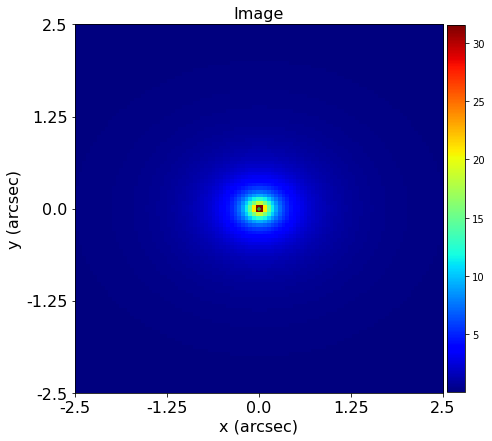

In [9]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.figures(image=True)

To perform ray-tracing, create a `MassProfile` from the `mass_profiles` module, which is imported as `mp` for 
conciseness. 

A `MassProfile` is an analytic function that describes the distribution of mass in a galaxy, and therefore 
can be used to derive its surface-density, gravitational potential and most importantly, its deflection angles. For 
those unfamiliar with lensing, the deflection angles describe how light is bent by the `MassProfile` due to the 
curvature of space-time.

In [10]:
sis_mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

print(sis_mass_profile)

SphericalIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


Just like above, we can pass a `Grid2D` to a `MassProfile` to compute its deflection angles. These are returned as the 
`Grid2D``s we used in the previous tutorials, so have full access to the `native` and `slim` structures. Just like 
the image above, they are computed on the sub-grid, so that we can bin up their values to compute more accurate 
deflection angles.

(If you are new to gravitiational lensing, and are unclear on what a `deflection-angle` means or what it is used for, 
then I'll explain all in tutorial 4 of this chapter. For now, just look at the pretty pictures they make, and worry 
about what they mean in tutorial 4!).

In [11]:
mass_profile_deflections = sis_mass_profile.deflections_from_grid(grid=grid)

print("deflection-angles of `Grid2D` sub-pixel 0:")
print(mass_profile_deflections.native[0, 0])
print("deflection-angles of `Grid2D` sub-pixel 1:")
print(mass_profile_deflections.native[0, 1])
print()
print("deflection-angles of `Grid2D` pixel 0:")
print(mass_profile_deflections.native_binned[0, 1])
print()
print("deflection-angles of central `Grid2D` pixels:")
print(mass_profile_deflections.native_binned[49, 49])
print(mass_profile_deflections.native_binned[49, 50])
print(mass_profile_deflections.native_binned[50, 49])
print(mass_profile_deflections.native_binned[50, 50])

deflection-angles of `Grid2D` sub-pixel 0:
[ 1.13137085 -1.13137085]
deflection-angles of `Grid2D` sub-pixel 1:
[ 1.13707034 -1.1256425 ]

deflection-angles of `Grid2D` pixel 0:
[ 1.14284852 -1.11976067]

deflection-angles of central `Grid2D` pixels:
[ 1.07164985 -1.07164985]
[1.07164985 1.07164985]
[-1.07164985 -1.07164985]
[-1.07164985  1.07164985]


A `ProfilePlotter`can plot these deflection angles.

(The black and red lines are the `critical curve` and `caustic` of the `MassProfile`. we'll cover what these are in 
a later tutorial.)

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


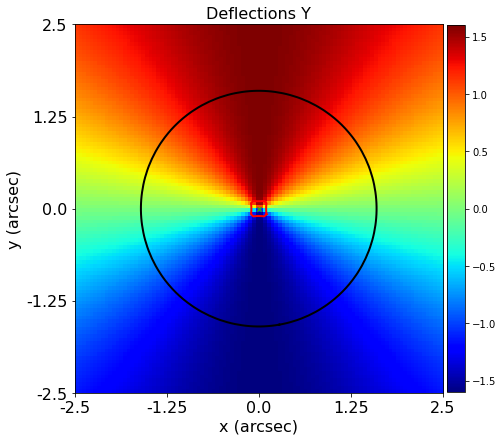

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


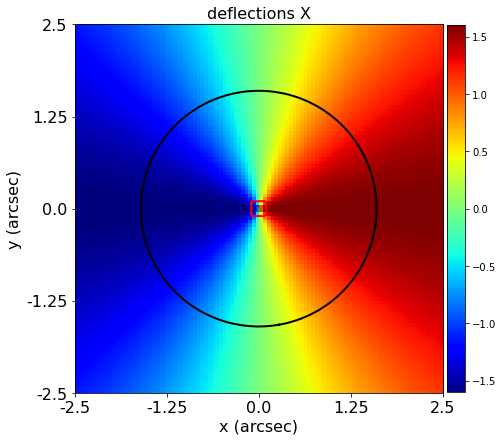

In [12]:
mass_profile_plottter = aplt.MassProfilePlotter(
    mass_profile=sis_mass_profile, grid=grid
)
mass_profile_plottter.figures(deflections_y=True, deflections_x=True)

`MassProfile`'s have a range of other properties that are used for lensing calculations, a couple of which we've plotted 
images of below:

 - Convergence: The surface mass density of the `MassProfile` in dimensionless units which are convenient for 
   lensing calcuations.
 - Potential: The gravitational of the `MassProfile` again in convenient dimensionless units.
 - Magnification: Describes how much brighter each image-pixel appears due to focusing of light rays by the `MassProfile`.

Extracting `Array2D`'s of these quantities from **PyAutoLens** is exactly the same as for the image and deflection angles above.

In [13]:
mass_profile_convergence = sis_mass_profile.convergence_from_grid(grid=grid)

mass_profile_potential = sis_mass_profile.potential_from_grid(grid=grid)

mass_profile_magnification = sis_mass_profile.magnification_from_grid(grid=grid)

Plotting them is equally straight forward.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


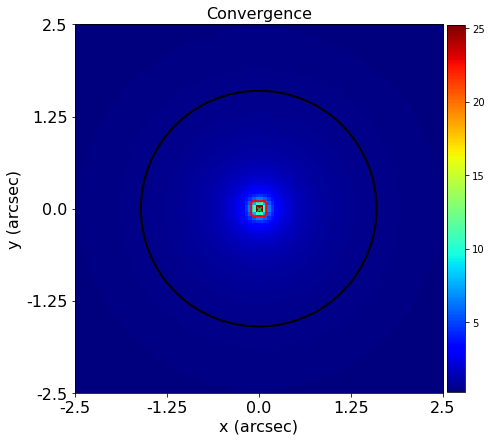

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


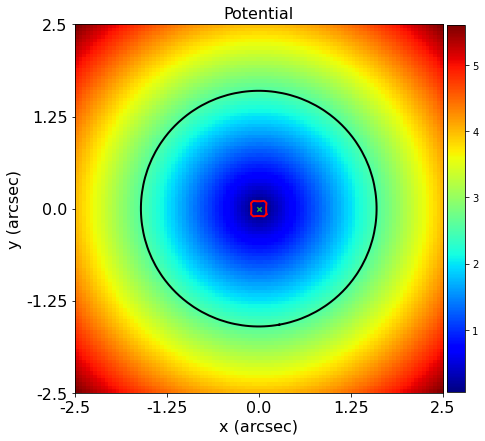

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


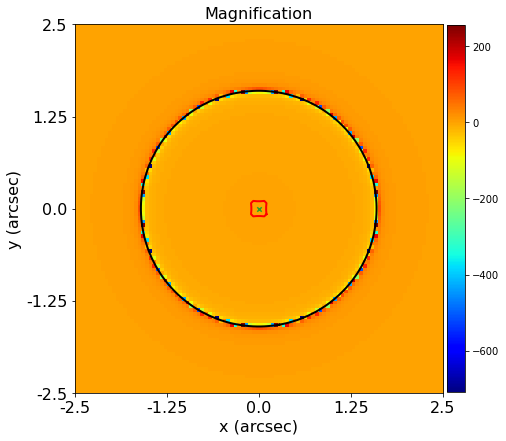

In [14]:
mass_profile_plottter.figures(convergence=True, potential=True, magnification=True)

Congratulations, you`ve completed your second **PyAutoLens** tutorial! Before moving on to the next one, experiment with 
**PyAutoLens** by doing the following:

1) Change the `LightProfile`'s effective radius and Sersic index - how does the image's appearance change?
2) Change the `MassProfile`'s einstein radius - what happens to the deflection angles, potential and convergence?
3) Experiment with different `LightProfile`'s and `MassProfile`'s in the light_profiles and mass_profiles modules. 
In particular, use the `EllipticalIsothermal` `Profile`.to introduce ellipticity into a `MassProfile`.

___Elliptical Components___

The `elliptical_comps` describe the ellipticity of the geometry of the light and mass profiles. You may be more 
familiar with a coordinate system where the ellipse is defined in terms of:

 - axis_ratio = semi-major axis / semi-minor axis = b/a
 - position angle phi, where phi is in degrees.

We can use the **PyAutoLens** `convert` module to determine the elliptical components from the axis-ratio and phi,
noting that the position angle phi is defined counter-clockwise from the positive x-axis.

In [15]:
elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.5, phi=45.0)

print(elliptical_comps)

(0.3333333333333333, 2.041077998578922e-17)


The elliptical components are related to the axis-ratio and position angle phi as follows:

    fac = (1 - axis_ratio) / (1 + axis_ratio)
    
    elliptical_comp[0] = elliptical_comp_y = fac * np.sin(2 * phi)
    elliptical_comp[1] = elliptical_comp_x = fac * np.cos(2 * phi)

The reason we use the elliptical components, instead of the axis-ratio and phi, to define a `Profile` geometry is that it
improves the lens modeling process. What is lens modeling? You'll find out in chapter 2!